In [1]:
using Pkg
Pkg.activate("/home/julisn/Codes/LadderDGA.jl/")
using LadderDGA
using Plots, LaTeXStrings

  Activating project at `~/Codes/LadderDGA.jl`


In [2]:
# Fd -> +U
# Fm -> -U

In [3]:
cfg = "/home/julisn/Codes/lDGA_pp_test/test_2/config.toml"
wp, mP, sP, env, kGridsStr = readConfig(cfg)
lDGAhelper = setup_LDGA(kGridsStr[1], mP, sP, env)
lDGAhelper_Ur = deepcopy(lDGAhelper)
lDGAhelper_Ur.Γ_m[:,:,:] = lDGAhelper_Ur.Γ_m[:,:,:] .- (-lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)
lDGAhelper_Ur.Γ_d[:,:,:] = lDGAhelper_Ur.Γ_d[:,:,:] .- ( lDGAhelper_Ur.mP.U / lDGAhelper_Ur.mP.β^2)

bubble     = calc_bubble(:DMFT, lDGAhelper);

[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.2-0.1 of size 10
┌ Warning: Using plain summation for λ₀, check Σ_ladder tails!
└ @ LadderDGA ~/Codes/LadderDGA.jl/src/BSETools.jl:148
┌ Info: Inputs Read. Starting Computation.
│ Local susceptibilities with ranges are:
│ χLoc_m(47:55) = 0.4209, χLoc_d(47:55) = 0.0533
└ sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2269692171283766 ?=? 0.23706873602877113 ?≈? 0.2370687360287711 ≟ 0.249649154356806"


In [4]:
χm, γm = calc_χγ(:m, lDGAhelper, bubble);
χd, γd = calc_χγ(:d, lDGAhelper, bubble);
#λ₀ = calc_λ0(bubble, lDGAhelper)
#Σ_ladder = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.46162090878 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.472473674937 ≟ 0


In [5]:
#χm_star, γm_star = calc_χγ(:m, lDGAhelper_Ur, bubble)
#χd_star, γd_star = calc_χγ(:d, lDGAhelper_Ur, bubble);

# Matrix identity for difference between chi and chi^star


Let A and (A+B) be invertible matrices and rank(B) = 1. Then (see lDGA numerics):

$(A+B)^{-1} = A^{-1} - \frac{1}{1+g} A^{-1} B A^{-1}$ and $g = Tr(B A^{1}) \neq 1$



In [6]:
using LinearAlgebra
@time χm_gen      = calc_gen_χ(lDGAhelper.Γ_m,    bubble, lDGAhelper.kG);
@time χm_star_gen = calc_gen_χ(lDGAhelper_Ur.Γ_m, bubble, lDGAhelper_Ur.kG);

  1.264451 seconds (729.68 k allocations: 1.838 GiB, 3.87% gc time, 35.74% compilation time)
  0.779172 seconds (33.95 k allocations: 1.793 GiB, 2.02% gc time)


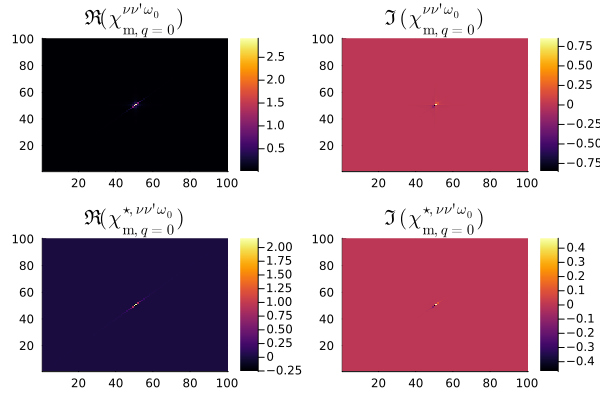

In [7]:
p1 = heatmap(real.(χm_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p2 = heatmap(imag.(χm_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p3 = heatmap(real.(χm_star_gen[:,:,1,51]), 
    title=L"\Re(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")
p4 = heatmap(imag.(χm_star_gen[:,:,1,51]), 
    title=L"\Im(\chi^{\star,\nu\nu'\omega_0}_{\mathrm{m},q=0})")

plot(p1, p2, p3, p4)

# Calculation of F_r

??????

$ \gamma^{\nu\omega}_{m/d,q} = \beta (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1}\sum \chi^{\star,\nu\nu'\omega}_{m/d,q} \pm 1 $ 


$ F^{\nu\nu'\omega}_{r,\mathbf{q}} = \beta^2 (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1} 
            -  \beta^2 (\chi^{\nu\omega}_0)^{-1} \chi^{*,\nu\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_0)^{-1} 
        + U_r (1 - U_r \chi^{\omega}_r) (\chi^{\nu\omega}_{0,\mathbf{q}})^{-1} \sum_{\nu_1\nu_2}\chi^{*,\nu\nu_1\omega}_{r,\mathbf{q}} \chi^{*,\nu_2\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_{0,\mathbf{q}})^{-1} $

### pm 1 missing?? 
$ F^{\nu\nu'\omega}_{r,\mathbf{q}} = 
            \beta^2 (\chi^{\nu\nu'\omega}_{0,\mathbf{q}})^{-1}
            -  \beta^2 (\chi^{\nu\omega}_{0,\mathbf{q}})^{-1} \chi^{*,\nu\nu'\omega}_{r,\mathbf{q}} (\chi^{\nu'\omega}_{0,\mathbf{q}})^{-1} 
        + U_r (1 - U_r \chi^{\omega}_r) (\gamma^{\nu\omega}_r \mp 1) (\gamma^{\nu'\omega}_r \mp 1) $
        
$ F^{\nu\nu'\omega}_{r,\mathbf{q}} =
        \beta^2 \left( \chi^{\nu\nu'\omega}_{0,\mathbf{q}} \right)^{-1} 
        +  \beta^2 \left( \chi^{\nu\omega}_{0,\mathbf{q}} \right)^{-1}  \chi^{\nu\nu'\omega}_{r,\mathbf{q}} \left( \chi^{\nu'\omega}_{0,\mathbf{q}} \right)^{-1} $

In [43]:
function core(χ₀::χ₀T)
    view(χ₀.data, :,χ₀.ν_shell_size+1:size(χ₀.data,2)-χ₀.ν_shell_size,:)
end

function F_from_χ_star_gen_test(χ₀::χ₀T, χstar_r::Array{ComplexF64,4}, χr::χT, γr::γT, Ur::Float64)
    F = similar(χstar_r)
    for ωi in axes(χstar_r,4)
        for qi in axes(χstar_r,3)
            for νpi in axes(χstar_r,2)
                for νi in axes(χstar_r,1)
            F[νi,νpi,qi,ωi]  = -χ₀.β^2 * χstar_r[νi,νpi,qi,ωi] / (core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
            F[νi,νpi,qi,ωi] +=  Ur * (1 - Ur * χr[qi,ωi]) * γr[qi,νi,ωi] * γr[qi,νpi,ωi]
                end
                F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
            end
        end
    end
    return F
end

function F_r_test(χ₀::χ₀T, χr)
    F = -deepcopy(χr)
    for ωi in 1:size(χm_gen,4)
        for qi in 1:size(χm_gen,3)
            for νpi in 1:size(χm_gen,2)
                for νi in 1:size(χm_gen,1)
                    F[νi,νpi,qi,ωi] = χ₀.β^2 .* F[νi,νpi,qi,ωi]/(core(χ₀)[qi,νi,ωi] * core(χ₀)[qi,νpi,ωi])
                end
                F[νpi,νpi,qi,ωi] += χ₀.β^2 / core(χ₀)[qi,νpi,ωi]
            end
        end
    end
    return F
end

function F_from_χ_star_gen(χ₀::χ₀T, χstar_r::Array{ComplexF64,4}, χr::χT, γr::γT, Ur::Float64)
    F = similar(χstar_r)
    for ωi in 1:size(χstar_r,4)
        for qi in 1:size(χstar_r,3)
            F[:,:,qi,ωi] = Diagonal(χ₀.β^2 ./ core(χ₀)[qi,:,ωi]) .- χ₀.β^2 .* χstar_r[:,:,qi,ωi] ./ (core(χ₀)[qi,:,ωi] .* transpose(core(χ₀)[qi,:,ωi]))
            F[:,:,qi,ωi] +=  Ur * (1 - Ur * χr[qi,ωi]) .* ((γr[qi,:,ωi]) .* transpose(γr[qi,:,ωi]))
        end
    end
    return F
end

F_from_χ_star_gen (generic function with 1 method)

In [44]:
@time F_m_test1 = F_r_test(bubble, χm_gen);

 18.414017 seconds (213.62 M allocations: 6.680 GiB, 3.49% gc time, 0.54% compilation time)


In [45]:
@time F_m_test2 = F_from_χ_star_gen_test(bubble, χm_star_gen, χm, γm, -lDGAhelper.mP.U);

  0.677680 seconds (5 allocations: 323.639 MiB, 1.29% gc time)


In [46]:
@time F_m_test3 = F_from_χ_star_gen(bubble, χm_star_gen, χm, γm, -lDGAhelper.mP.U);

  0.840950 seconds (38.18 k allocations: 1.918 GiB, 4.54% gc time)


In [52]:
test1 = sum(abs.(F_m_test1 .- F_m_test2))
test2 = sum(abs.(F_m_test1 .- F_m_test3))
println("$test1, $test2")

13.418303749954367, 13.418303749513717


lim: -1.994920523460095 ?=? -2.0


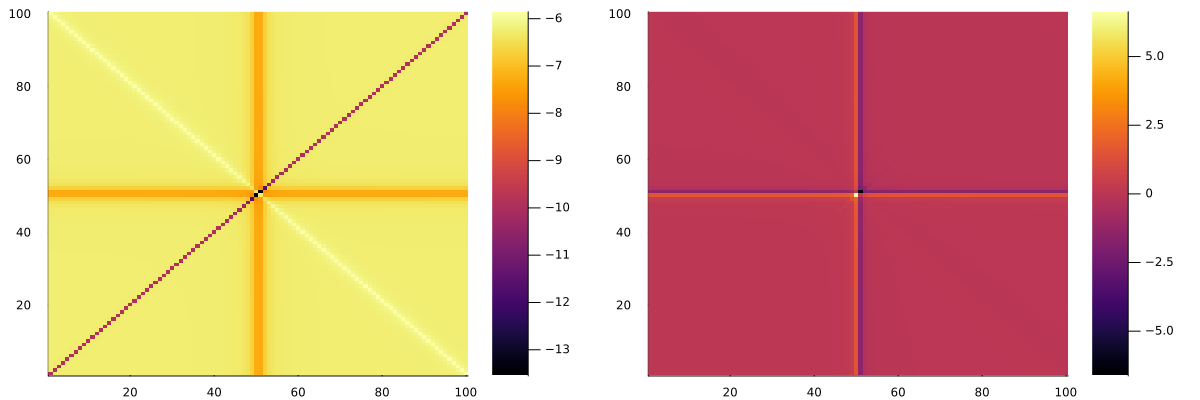

In [53]:
ωi = 51
qi = 4
p1 = heatmap(real(F_m_test1[:,:,qi,ωi]), titel="Re Test1")
p2 = heatmap(imag(F_m_test1[:,:,qi,ωi]), titel="Im Test1")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -1.994920523460095 ?=? -2.0


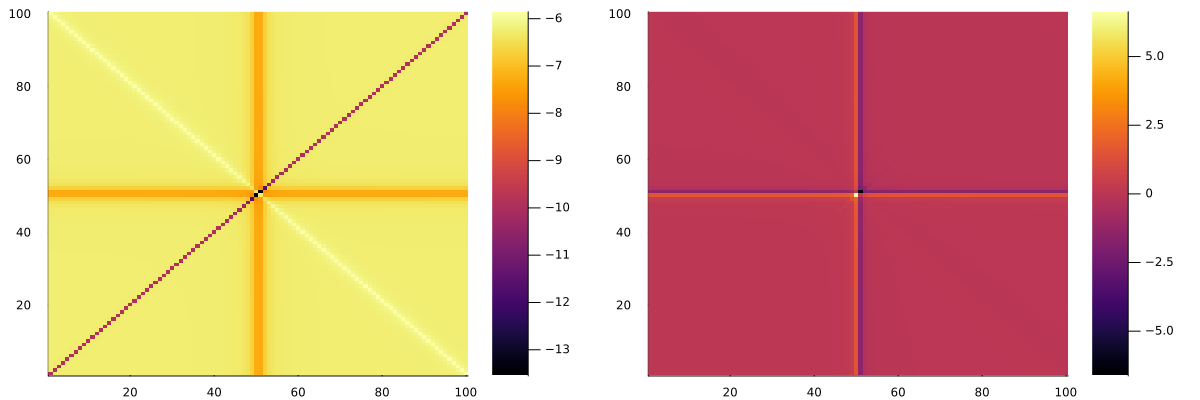

In [54]:
p1 = heatmap(real(F_m_test2[:,:,qi,ωi]), titel="Re Test4")
p2 = heatmap(imag(F_m_test2[:,:,qi,ωi]), titel="Im Test4")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -1.994920523460095 ?=? -2.0


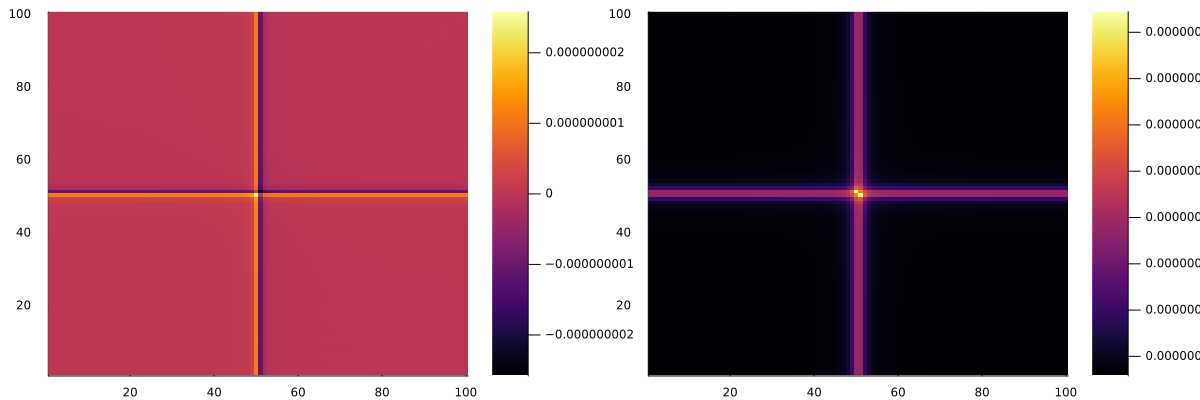

In [55]:
p1 = heatmap(real(F_m_test2 .- F_m_test1)[:,:,qi,ωi], titel="Re Test4")
p2 = heatmap(imag(F_m_test2 .- F_m_test1)[:,:,qi,ωi], titel="Im Test4")
println("lim: ", real(F_m_test1[1,15,qi,1]), " ?=? ", -lDGAhelper.mP.U)
plot(p1, p2, size=(1200,400))

lim: -49.8730130865024


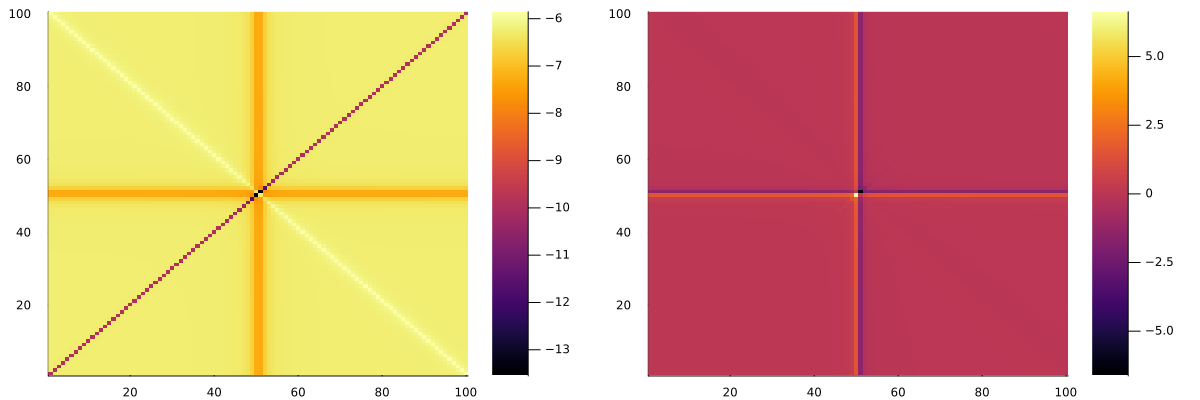

In [56]:
p1 = heatmap(real(F_m_test3[:,:,qi,ωi]), titel="Re Test3")
p2 = heatmap(imag(F_m_test3[:,:,qi,ωi]), titel="Im Test3")
println("lim: ", real(F_m_test3[1,15,qi,1]) .* lDGAhelper.mP.β^2)
plot(p1, p2, size=(1200,400))

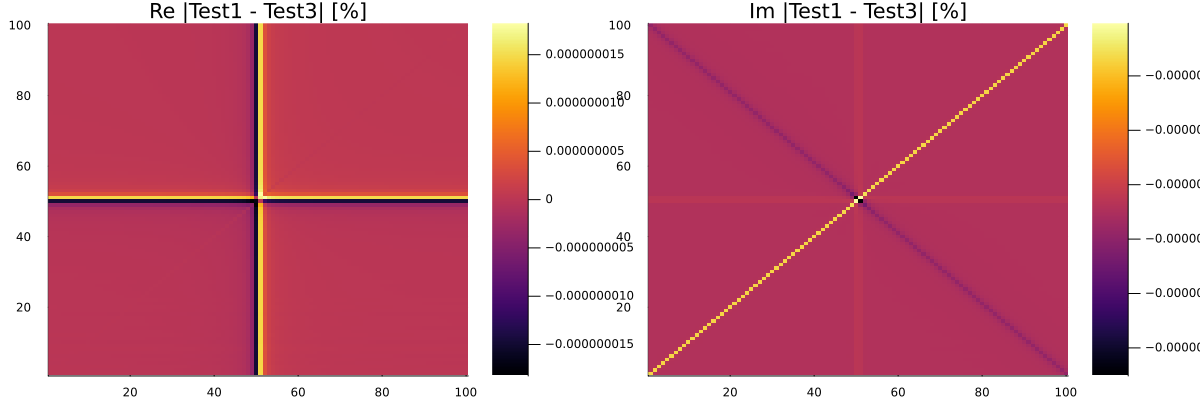

In [34]:
p1 = heatmap(100 .* real(((F_m_test1 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Re |Test1 - Test3| [%]")
p2 = heatmap(100 .* imag(((F_m_test1 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Im |Test1 - Test3| [%]")
plot(p1, p2, size=(1200,400))

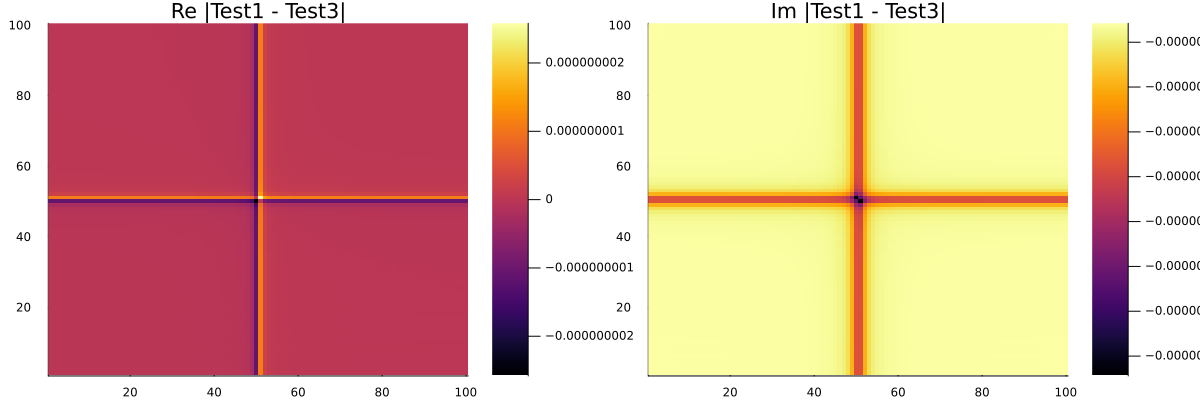

In [35]:
p1 = heatmap(real(((F_m_test1 .- F_m_test3))[:,:,qi,ωi]), title="Re |Test1 - Test3|")
p2 = heatmap(imag(((F_m_test1 .- F_m_test3))[:,:,qi,ωi]), title="Im |Test1 - Test3|")
plot(p1, p2, size=(1200,400))

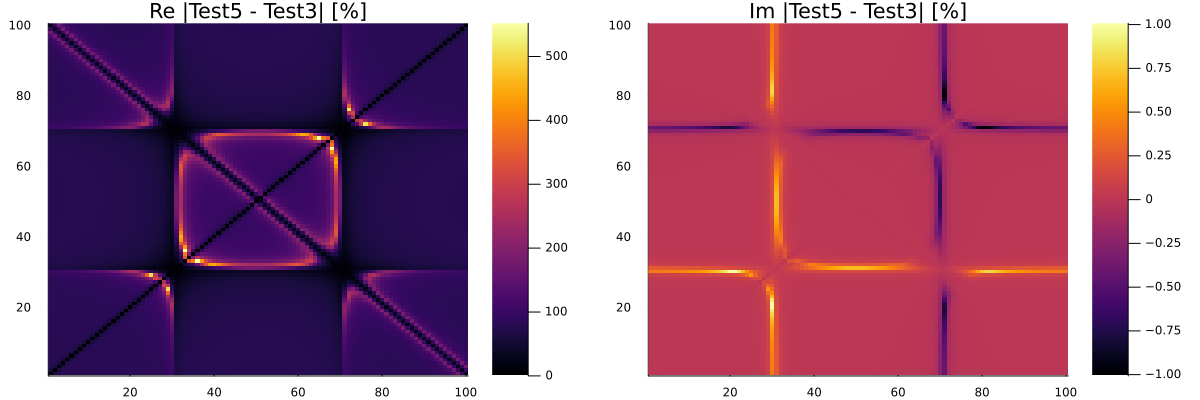

In [23]:
p1 = heatmap(100 .* real(((F_m_test5 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Re |Test5 - Test3| [%]")
p2 = heatmap(100 .* imag(((F_m_test5 .- F_m_test3)./abs.(F_m_test3))[:,:,qi,ωi]), title="Im |Test5 - Test3| [%]")
plot(p1, p2, size=(1200,400))

In [20]:
F_m_loc = F_from_χ(lDGAhelper.χDMFT_m, lDGAhelper.gImp[1, :], lDGAhelper.sP, lDGAhelper.mP.β);

In [21]:
ωi = 110

ωn = (-lDGAhelper.sP.n_iω:lDGAhelper.sP.n_iω)[ωi]
p1 = heatmap(real(F_m_test2[:,:,1,ωi]), title=L"\Re F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{lD}\Gamma\mathrm{A},\mathbf{q}=0}")
p2 = heatmap(real(F_m_loc[:,:,ωi]), title=L"\Re F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{loc}}")
p3 = heatmap(imag(F_m_test2[:,:,1,ωi]), title=L"\Im F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{lD}\Gamma\mathrm{A},\mathbf{q}=0}")
p4 = heatmap(imag(F_m_loc[:,:,ωi]), title=L"\Im F^{\nu\nu'\omega_{%$ωn}}_{\mathrm{m},\mathrm{loc}}")
plot(p1, p2, p3, p4, size=(800,600))

LoadError: BoundsError: attempt to access 101-element UnitRange{Int64} at index [110]

## F_r asympt checks

In [22]:
U = lDGAhelper.mP.U
β = lDGAhelper.mP.β
χ_d_asympt = lDGAhelper.sP.χ_helper.χch_asympt
χ_m_asympt = lDGAhelper.sP.χ_helper.χsp_asympt
χ_pp_asympt = lDGAhelper.sP.χ_helper.χpp_asympt

Fd_lim_diag =  U + U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 - 1 * U^2 * χ_d_asympt[1]/β^2
Fm_lim_diag = -U + U^2/2 * χ_d_asympt[1]/β^2 - 0.5 * U^2 * χ_m_asympt[1]/β^2 - 1 * U^2 * χ_m_asympt[1]/β^2
Fs_lim_diag = 2U - U^2/2 * χ_d_asympt[1]/β^2 + 1.5 * U^2 * χ_m_asympt[1]/β^2 - 2 * U^2 * χ_pp_asympt[1]/β^2
Ft_lim_diag =      U^2/2 * χ_d_asympt[1]/β^2 + 0.5 * U^2 * χ_m_asympt[1]/β^2 ;

Fd_lim_bg =  U - 1 * U^2 * χ_d_asympt[1]/β^2 
Fm_lim_bg = -U - 1 * U^2 * χ_m_asympt[1]/β^2 
Fs_lim_bg = 2U - 2 * U^2 * χ_pp_asympt[1]/β^2
Ft_lim_bg = 0.0;

LoadError: type Nothing has no field χch_asympt

In [23]:
# - compensates global -1 factor in script

function format_out(val, lim; digits=5)
    lim_s = lpad(rpad(round(real(lim),digits=digits), 6, "0"),10, " ")
    val_s = lpad(rpad(round(real(val),digits=digits), 6, "0"),10, " ")
    sim = isapprox(val, lim, atol=0.1) ? "\e[1m\e[38;2;0;150;50;249m✓\x1b[0m" :  "\e[1m\e[38;2;250;0;0;249m↯\x1b[0m"
    return "$val_s ≟ $lim_s  " * sim
end

nBose = lDGAhelper.sP.n_iω
nan_ind = trunc(Int,nBose/2+10)
testlist = [("direct qi=$qi", F_m_test1[:,:,qi,:]) for qi in 1:size(F_m_test3,3)]
testlist = [("t1",F_m_test1[:,:,1,:]),("t2",F_m_test2[:,:,1,:]),("t3",F_m_test3[:,:,1,:]),("t4",F_m_test4[:,:,1,:]),("t5",F_m_test5[:,:,1,:])]
println("                   numerical ≟ exact")
println("   ================ F ==================   ")
for (name, val) in testlist
    println("Diagonal $name   :   $(format_out(val[1,1,nBose+1] , Fm_lim_diag))")
    println("Background $name :   $(format_out(val[30,1,nBose+1], Fm_lim_bg))")
end

LoadError: UndefVarError: `F_m_test1` not defined

# Lin. Eliashberg Eq.

$\Gamma^{\nu\nu'\omega}_{kk'q} = F^{\nu\nu'\omega}_{\mathrm{ladder}} - \Phi^{\nu\nu'\omega}_{\mathrm{loc},\mathrm{pp}}$

$ \lambda \Delta^{\nu}_{k} = \sum_{\nu k} \Gamma^{\nu\nu'\omega=0}_{kk'q=0} G^{\nu'}_{k'} G^{-\nu'}_{-k'} \Delta^{\nu'}_{k'}$

In [ ]:
\lambda Delta^{\nu}_{k} = \sum_{\nu k} \Gamma^{\nu\nu'\omega=0}_{kk'q=0} G^{\nu'}_{k'} G^{-\nu'}_{-k'} \Delta^{\nu'}_{k'}